In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Load the data.
dataset = pd.read_csv('datasets/network-logs.csv')

In [2]:
samples = dataset.iloc[:, [1, 2]].values
targets = dataset['ANOMALY'].values

In [3]:
print(dataset.describe())

       REMOTE_PORT     LATENCY  THROUGHPUT     ANOMALY
count   405.000000  405.000000  405.000000  405.000000
mean     63.555556   14.420702   15.392091    0.029630
std     106.300247    1.449806    1.172879    0.169773
min      20.000000    4.752613    4.126232    0.000000
25%      21.000000   13.408520   15.223188    0.000000
50%      21.000000   15.014320   15.572503    0.000000
75%      80.000000   15.489068   15.868064    0.000000
max     443.000000   23.339868   24.350407    1.000000


/home/pavlo/anaconda3/envs/studying/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


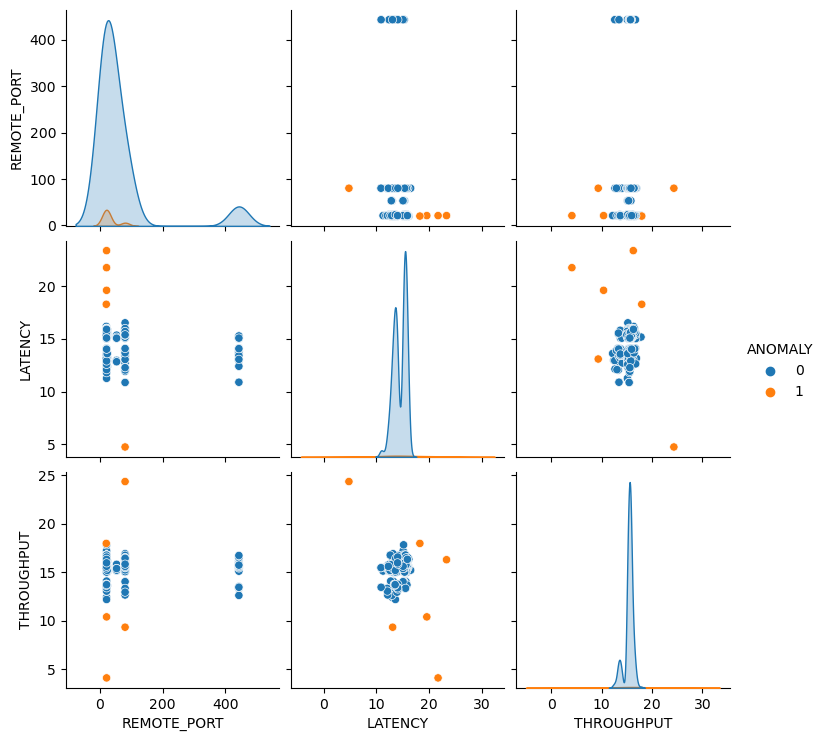

<Figure size 2000x2000 with 0 Axes>

In [4]:
# Data Visualization
sns.pairplot(dataset, hue='ANOMALY', diag_kind='kde')
plt.figure(figsize=(20, 20))
plt.show()

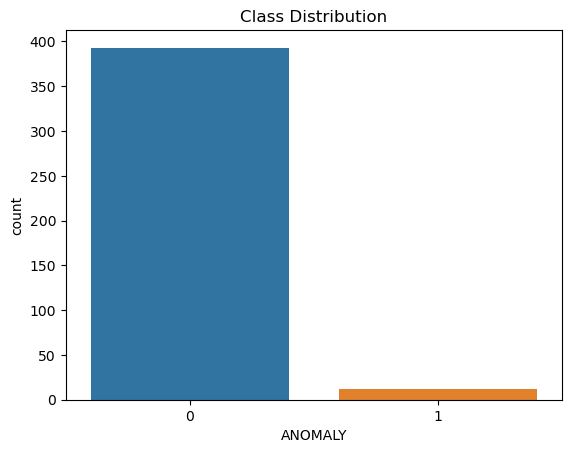

In [5]:
# Class Distribution
sns.countplot(x='ANOMALY', data=dataset)
plt.title('Class Distribution')
plt.show()

In [6]:
training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.3, random_state=0)

K-Nearest Neighbours accuracy: 95.90163934426229


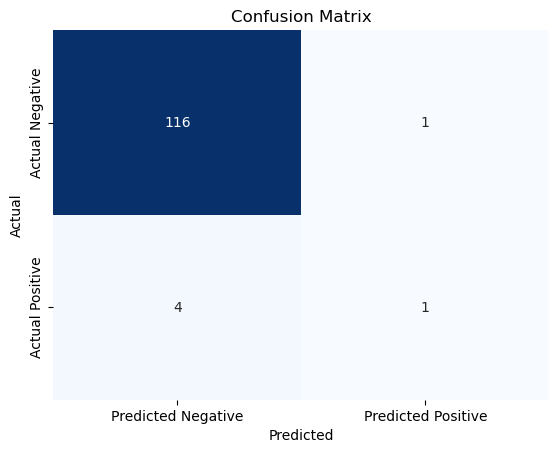

In [7]:
# k-Nearest Neighbors model
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(training_samples,training_targets)
knc_prediction = knc.predict(testing_samples)
knc_accuracy = 100.0 * accuracy_score(testing_targets, knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))

conf_matrix = confusion_matrix(testing_targets, knc_prediction)

# Create a beautiful heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree accuracy: 96.72131147540983


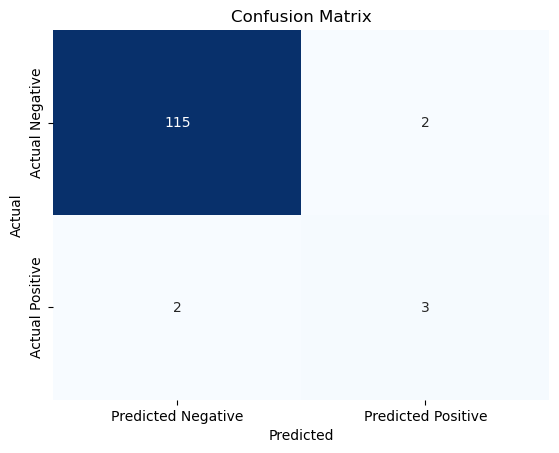

In [8]:
# Decision tree model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(training_samples,training_targets)
dtc_prediction = dtc.predict(testing_samples)
dtc_accuracy = 100.0 * accuracy_score(testing_targets, dtc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))

conf_matrix = confusion_matrix(testing_targets, dtc_prediction)

# Create a beautiful heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gaussian Naive Bayes accuracy: 98.36065573770492


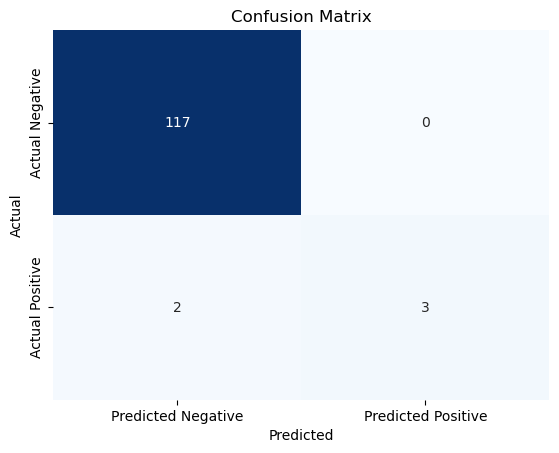

In [9]:
# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(training_samples,training_targets)
gnb_prediction = gnb.predict(testing_samples)
gnb_accuracy = 100.0 * accuracy_score(testing_targets, gnb_prediction)
print ("Gaussian Naive Bayes accuracy: " + str(gnb_accuracy))

conf_matrix = confusion_matrix(testing_targets, gnb_prediction)

# Create a beautiful heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

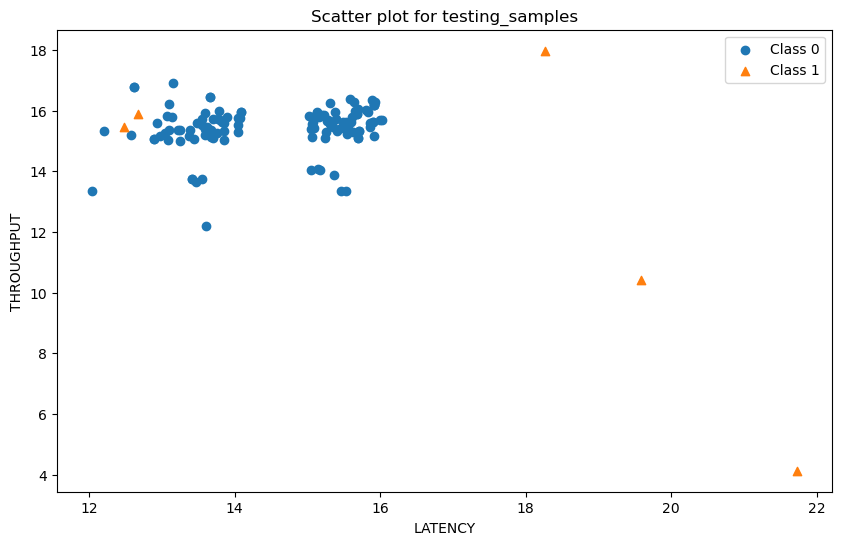

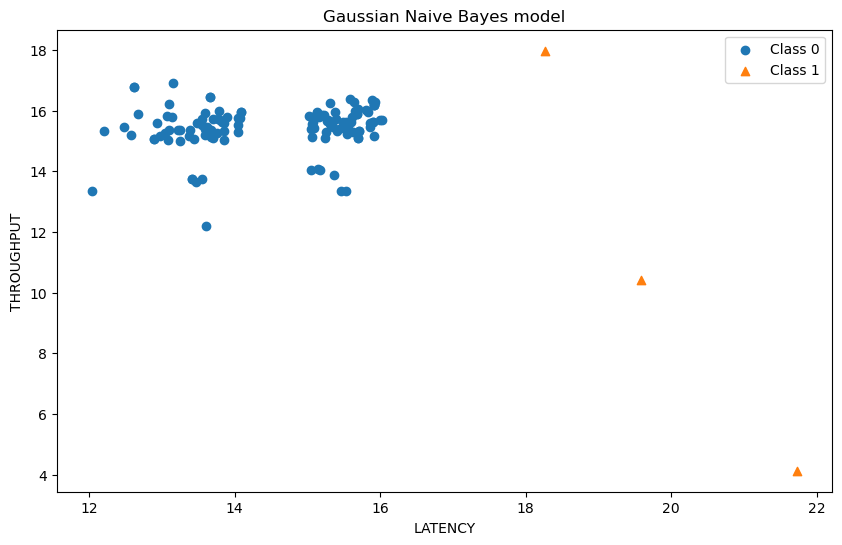

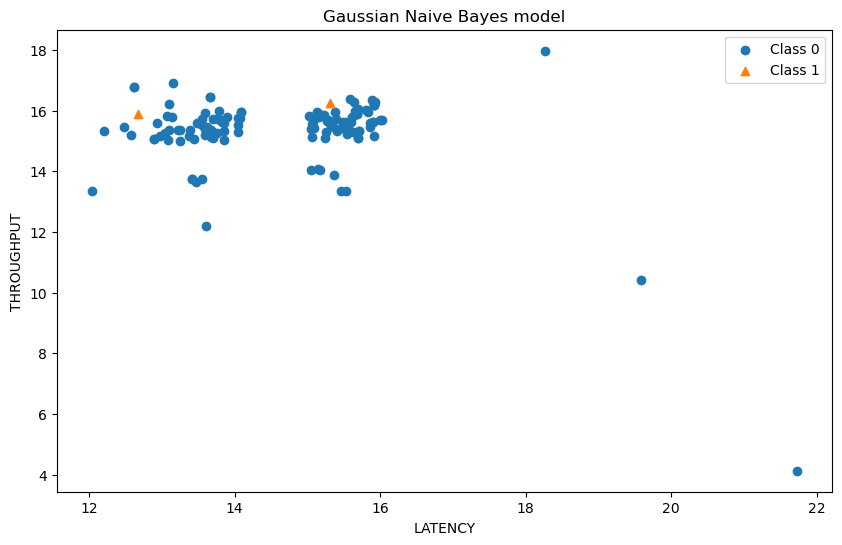

In [10]:
plt.figure(figsize=(10, 6))

class_0_indices = testing_targets == 0
class_1_indices = testing_targets == 1

plt.scatter(testing_samples[class_0_indices, 0], testing_samples[class_0_indices, 1], marker='o', label='Class 0')
plt.scatter(testing_samples[class_1_indices, 0], testing_samples[class_1_indices, 1], marker='^', label='Class 1')
plt.title('Scatter plot for testing_samples')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.legend()
plt.show()

# Gaussian Naive Bayes model
plt.figure(figsize=(10, 6))

class_0_indices = gnb_prediction == 0
class_1_indices = gnb_prediction == 1

plt.scatter(testing_samples[class_0_indices, 0], testing_samples[class_0_indices, 1], marker='o', label='Class 0')
plt.scatter(testing_samples[class_1_indices, 0], testing_samples[class_1_indices, 1], marker='^', label='Class 1')
plt.title('Gaussian Naive Bayes model')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.legend()
plt.show()


# k-Nearest Neighbors model
plt.figure(figsize=(10, 6))

class_0_indices = knc_prediction == 0
class_1_indices = knc_prediction == 1

plt.scatter(testing_samples[class_0_indices, 0], testing_samples[class_0_indices, 1], marker='o', label='Class 0')
plt.scatter(testing_samples[class_1_indices, 0], testing_samples[class_1_indices, 1], marker='^', label='Class 1')
plt.title('Gaussian Naive Bayes model')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.legend()
plt.show()



In [11]:
dataset2 = pd.read_csv('datasets/Network_anomaly_data.csv')

In [12]:
dataset2['aattack_binary'] = dataset2['attack'].apply(lambda x: 1 if x == 'normal' else 0)
dataset2

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,aattack_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,1
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,1
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,0


In [13]:
# Assuming your features are stored in 'X' and the target variable in 'y'
x = dataset2.drop(['attack', 'aattack_binary'], axis=1)  # Features excluding 'attack' and 'aattack_binary'
y = dataset2['aattack_binary']  # Target variable 'aattack_binary'

In [14]:

numeric_columns = x.select_dtypes(include=['float64']).columns

# Extract only the numeric columns
x_numeric = x[numeric_columns]


In [15]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_numeric)

# Convert the result back to a DataFrame
x_norm = pd.DataFrame(x_norm, columns=x_numeric.columns)

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (100778, 15) (100778,)
Testing set shape: (25195, 15) (25195,)


K-Nearest Neighbours accuracy: 97.54316332605676


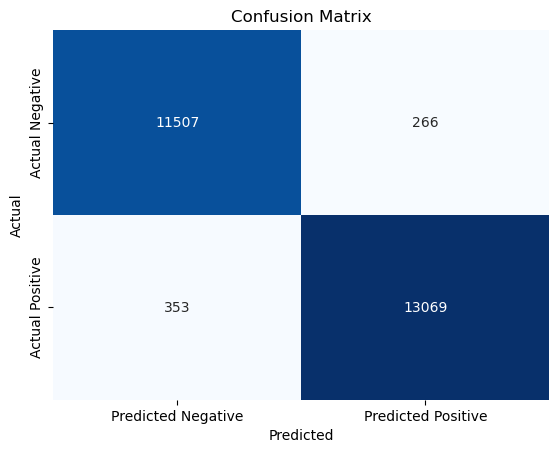

In [17]:
# k-Nearest Neighbors model
knc = KNeighborsClassifier(n_neighbors=15)
knc.fit(X_train,y_train)
knc_Y = knc.predict(X_test)
knc_accuracy = 100.0 * accuracy_score(y_test, knc_Y)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))

conf_matrix = confusion_matrix(y_test, knc_Y)

# Create a beautiful heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree accuracy: 98.13058146457631


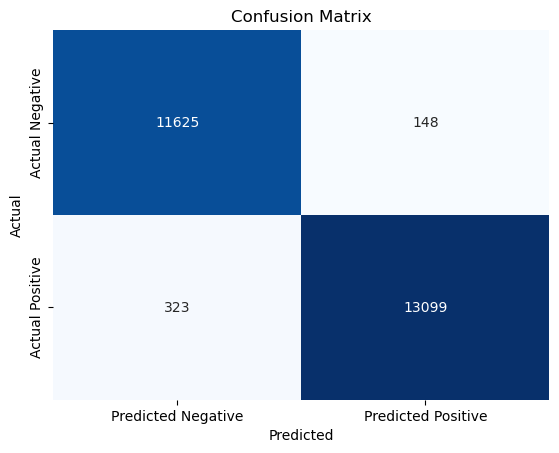

In [18]:
# Decision tree model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
dtc_Y = dtc.predict(X_test)
dtc_accuracy = 100.0 * accuracy_score(y_test, dtc_Y)
print ("Decision Tree accuracy: " + str(dtc_accuracy))

conf_matrix = confusion_matrix(y_test, dtc_Y)

# Create a beautiful heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gaussian Naive Bayes accuracy: 86.19567374479064


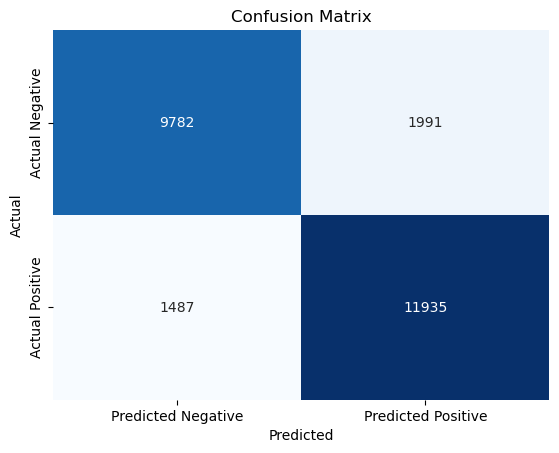

In [19]:
# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_Y = gnb.predict(X_test)
gnb_accuracy = 100.0 * accuracy_score(y_test, gnb_Y)
print ("Gaussian Naive Bayes accuracy: " + str(gnb_accuracy))

conf_matrix = confusion_matrix(y_test, gnb_Y)

# Create a beautiful heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# Accuracy
accuracy = accuracy_score(y_test, gnb_Y)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, gnb_Y)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, gnb_Y)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, gnb_Y)
print("F1-Score:", f1)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, gnb_Y)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.8619567374479064
Precision: 0.8570300157977883
Recall: 0.8892117419162568
F1-Score: 0.8728243381600116
ROC-AUC Score: 0.8600479842682449
